In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

In [0]:
import xlrd
import csv

data_train_path = (r"/content/drive/My Drive/Colab Notebooks/Verzeo Internship/Major Project/datasets/Data_Train.xlsx")
data_test_path = (r"/content/drive/My Drive/Colab Notebooks/Verzeo Internship/Major Project/datasets/Data_Test.xlsx")
data_train_csv_path = (r"/content/drive/My Drive/Colab Notebooks/Verzeo Internship/Major Project/datasets/Data_Train.csv")
data_test_csv_path = (r"/content/drive/My Drive/Colab Notebooks/Verzeo Internship/Major Project/datasets/Data_Test.csv")

def csv_from_excel(data_path , csv_path):
    wb = xlrd.open_workbook(data_path)
    sh = wb.sheet_by_name('Sheet1')
    your_csv_file = open(csv_path, 'w')
    wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    your_csv_file.close()

# runs the csv_from_excel function:
csv_from_excel(data_train_path , data_train_csv_path)
csv_from_excel(data_test_path , data_test_csv_path)

In [117]:
data_train = pd.read_csv(data_train_csv_path)
data_test = pd.read_csv(data_test_csv_path)
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [118]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   float64
 3   Kilometers_Driven  6019 non-null   float64
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(4), object(8)
memory usage: 564.4+ KB


In [119]:
data_train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [120]:
data_train.shape , data_test.shape

((6019, 12), (1234, 11))

In [121]:
data_train.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [122]:
data_test.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [123]:
data_train["Mileage"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
6014    False
6015    False
6016    False
6017    False
6018    False
Name: Mileage, Length: 6019, dtype: bool

In [124]:
df1 = data_train[data_train.isna().any(axis=1)]
df2 = data_test[data_test.isna().any(axis=1)]
df1.shape,df2.shape

((44, 12), (11, 11))

In [125]:
empty_cols_list_train = ["Mileage","Engine","Power","Seats"] 
empty_cols_list_test = ["Engine","Power","Seats"] 

def my_Nan_filling_function(dataset , empty_cols_list):
    for i in range(len(empty_cols_list)):
        # Replacing Nan with mode values
        dataset[empty_cols_list[i]].fillna(dataset[empty_cols_list[i]].mode()[0] , inplace = True)

    print(dataset)

my_Nan_filling_function(data_train , empty_cols_list_train)

                                  Name    Location  ...  Seats  Price
0               Maruti Wagon R LXI CNG      Mumbai  ...    5.0   1.75
1     Hyundai Creta 1.6 CRDi SX Option        Pune  ...    5.0  12.50
2                         Honda Jazz V     Chennai  ...    5.0   4.50
3                    Maruti Ertiga VDI     Chennai  ...    7.0   6.00
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  ...    5.0  17.74
...                                ...         ...  ...    ...    ...
6014                  Maruti Swift VDI       Delhi  ...    5.0   4.75
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  ...    5.0   4.00
6016             Mahindra Xylo D4 BSIV      Jaipur  ...    8.0   2.90
6017                Maruti Wagon R VXI     Kolkata  ...    5.0   2.65
6018             Chevrolet Beat Diesel   Hyderabad  ...    5.0   2.50

[6019 rows x 12 columns]


In [126]:
data_train.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [127]:
my_Nan_filling_function(data_test , empty_cols_list_test)

                                                   Name  ... Seats
0                               Maruti Alto K10 LXI CNG  ...   4.0
1                         Maruti Alto 800 2016-2019 LXI  ...   5.0
2             Toyota Innova Crysta Touring Sport 2.4 MT  ...   7.0
3                                  Toyota Etios Liva GD  ...   5.0
4                                     Hyundai i20 Magna  ...   5.0
...                                                 ...  ...   ...
1229                  Volkswagen Vento Diesel Trendline  ...   5.0
1230                             Volkswagen Polo GT TSI  ...   5.0
1231                             Nissan Micra Diesel XV  ...   5.0
1232                             Volkswagen Polo GT TSI  ...   5.0
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...  ...   5.0

[1234 rows x 11 columns]


In [128]:
data_test.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

# Exploratory Data Analysis and Feature Engineering


In [129]:
data_train.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3791,Nissan Terrano XL,Hyderabad,2013.0,63220.0,Petrol,Manual,First,13.24 kmpl,1598 CC,102.5 bhp,5.0,6.5
5017,Toyota Fortuner 3.0 Diesel,Hyderabad,2013.0,63455.0,Diesel,Manual,First,11.5 kmpl,2982 CC,171 bhp,7.0,19.0
2432,Toyota Camry Hybrid,Chennai,2016.0,29277.0,Petrol,Automatic,First,19.16 kmpl,2494 CC,158.2 bhp,5.0,27.0
1253,Hyundai Accent Executive,Jaipur,2010.0,52325.0,Petrol,Manual,First,16.36 kmpl,1495 CC,93.7 bhp,5.0,2.0
918,BMW X5 2014-2019 xDrive 30d Design Pure Experi...,Hyderabad,2016.0,76000.0,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,7.0,58.0


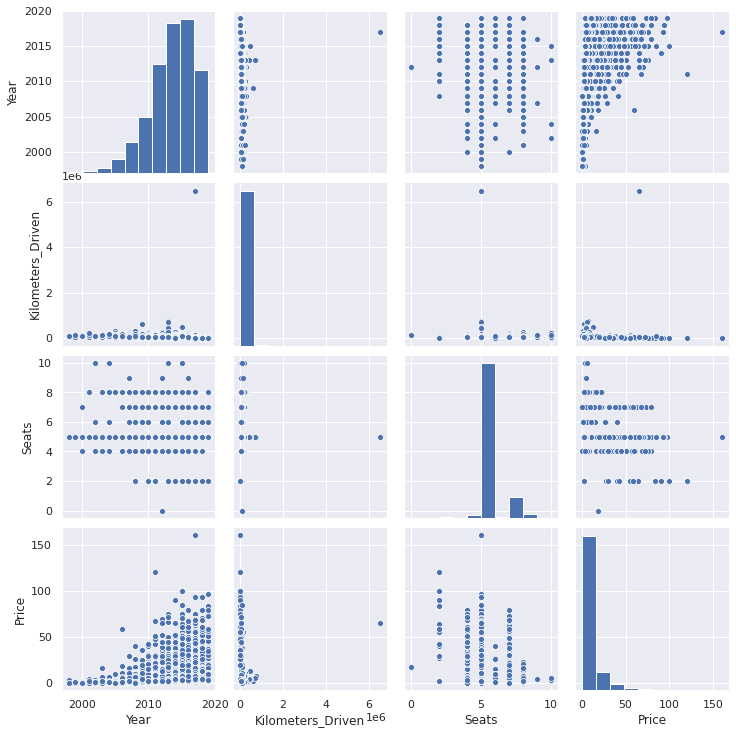

In [130]:
sns.pairplot(data_train)

In [131]:
data_train["Fuel_Type"].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [132]:
data_train["Kilometers_Driven"].value_counts()

60000.0    82
45000.0    70
65000.0    68
50000.0    61
70000.0    60
           ..
25948.0     1
42831.0     1
54996.0     1
77469.0     1
88578.0     1
Name: Kilometers_Driven, Length: 3093, dtype: int64

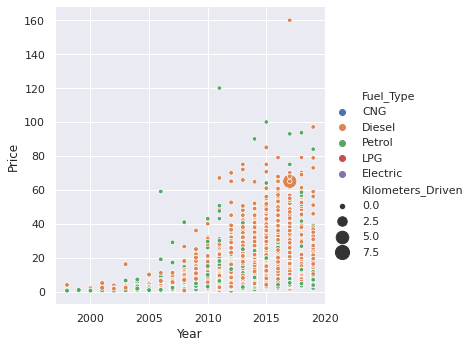

In [133]:
sns.relplot(x = "Year" , y = "Price" , data = data_train , hue = "Fuel_Type" , 
            size = "Kilometers_Driven", sizes=(20,200))

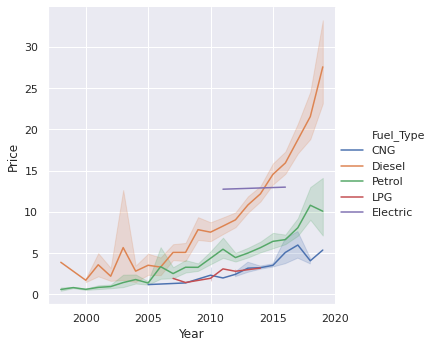

In [147]:
sns.relplot(x = "Year" , y = "Price" , data = data_train , hue = "Fuel_Type",  kind = "line" )

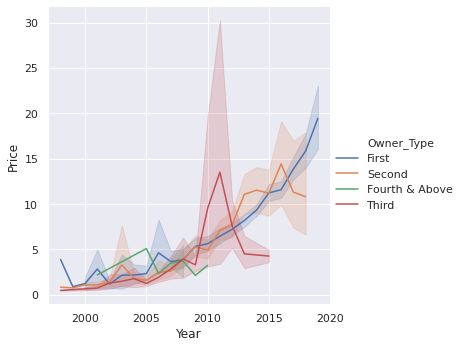

In [148]:
sns.relplot(x = "Year" , y = "Price" , data = data_train , hue = "Owner_Type", kind = "line" )

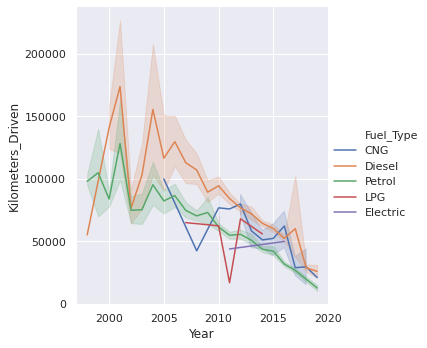

In [149]:
sns.relplot(x = "Year" , y = "Kilometers_Driven" , data = data_train , hue = "Fuel_Type"  ,  kind = "line" )

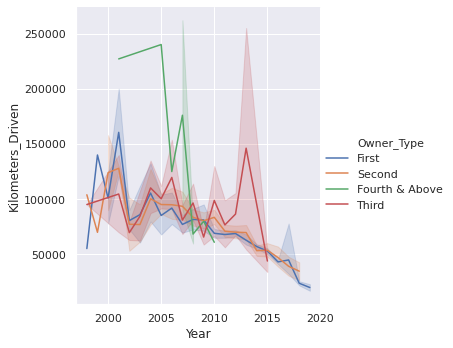

In [150]:
sns.relplot(x = "Year" , y = "Kilometers_Driven" , data = data_train ,
            hue = "Owner_Type"  ,  kind = "line" )